# PROYECTO AIRBNB NEW YORK

## Inicio

# 1. Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("NY_airbnb.csv")

# 2. Exploración básica de datos

## 2.1 A continuacion mostramos el resumen de las variables que hay en el DataFrame

* **id:** identificador del alojamiento
* **name** caraterísticas del alojamiento
* **host_i** identificador del hospedador
* **host_name** nombre del hospedador
* **neighbourhood_group** nombre del Borough (distrito)
* **neighbourhood** vecindario
* **latitude** latitud
* **longitude** longitud
* **room_type** tipo de alojamiento
* **price** precio por noche
* **minimum_nights** mínimo de noches
* **number_of_reviews** número de visitas
* **last_review** última visitas
* **reviews_per_month** visitas por mes
* **calculated_host_listings_count** cantidad de huespedes aceptados
* **availability_365** disponibilidad durante el año

### 2.2 Ver las primeras cinco entradas

In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2.3 Ver el total de filas y columnas

In [3]:
df.shape

(48895, 16)

### 2.4 Variables estadisticas 

In [4]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### 2.5 Información sobre el dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### 2.6 Observamos numericos, objects y flotantes

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### 2.7 Total de datos perdidos

In [7]:
df.isnull().sum(axis =0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Los datos faltantes de las columnas "name", "host_name", "review_per_month" y "number_of_review", por sus características propias, carecen de relevancia para el análisis requerido**

### 2.8 Verificación de la existencia de datos duplicados, no hay!!

In [8]:
df.duplicated().sum()

0

### 2.9 Con groupby hemos agrupado la información de los 5 Distritos con el fin de consolidar los datos y visualizar la concentración de la oferta 

In [9]:
nhgroup = df.groupby("neighbourhood_group").count()

nhgroup 

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


### 2.10 Total de vecindarios listados en los cinco Distritos

In [10]:
len(df.neighbourhood.unique())

221

### 2.11 Listado del total de vecindarios

In [11]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

### 2.12 Los 15 vecindarios con mayor concentración de demanda de alojamiento

In [12]:
df.neighbourhood.value_counts().head(15)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

### 2.13 Los quince principales propietarios de alojamientos vacacionales en los 5 Distritos de NYC

In [13]:
top_host=df.host_id.value_counts().head(15)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

### 2.14  Confirmación del propietrio con más y menor oferta listada para alquiler vacacional

In [14]:
top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

In [15]:
top_host_check=df.calculated_host_listings_count.min()
top_host_check

1

### 2.15 A continuacion se muestra la principal propietaria con la ubicacion de los inmubles listados

In [16]:
path_to_data = ('NY_airbnb.csv')
df = pd.read_csv(path_to_data)

#contador
i=0
#bucle

for i in range(len(df['host_id'])):
# cargamos los resultados
    host_id = df['host_id'][i]
    host_name = df['host_name'][i]
    neighbourhood_group = df['neighbourhood_group'][i]
    neighbourhood = df['neighbourhood'][i]
    
    #busca 498201
    if 219517861 == host_id:
        #muestra
        print(f"{host_name} , {host_id}, {neighbourhood_group}, {neighbourhood}")


Sonder (NYC) , 219517861, Manhattan, Financial District
Sonder (NYC) , 219517861, Manhattan, Financial District
Sonder (NYC) , 219517861, Manhattan, Financial District
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Hell's Kitchen
Sonder (NYC) , 219517861, Manhattan, Hell's Kitchen
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Hell's Kitchen
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Murray Hill
Sonder (NYC) , 219517861, Manhattan, Financial District
Sonder (NYC) , 219517861, Manhattan, Financial District
Sonder (NYC) , 219517861,

### 2.16 Total de la oferta por tipo de alojamiento

In [17]:
df.groupby("room_type")["room_type"].count()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

### 2.17 Media del precio por noche en los 5 Distritos de NYC

In [18]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

**La data nos muestra los Distritos con alquiler mas costo: Manhattan, Brooklyn, Staten Island, Queens, Bronx**

### 2.18 Distribución por tipo de alojamiento y las distintas variables estadísticas del precio por cada uno los 5 Distritos de NYC

In [19]:
df.groupby(['neighbourhood_group', 'room_type'])['price'].agg(['count', 'min', 'max', 'mean' ,'median', 'std'])

count  min    max        mean  median  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt    379   28   1000  127.506596   100.0   
                    Private room       652    0   2500   66.788344    53.5   
                    Shared room         60   20    800   59.800000    40.0   
Brooklyn            Entire home/apt   9559    0  10000  178.327545   145.0   
                    Private room     10132    0   7500   76.500099    65.0   
                    Shared room        413    0    725   50.527845    36.0   
Manhattan           Entire home/apt  13199    0  10000  249.239109   191.0   
                    Private room      7982   10   9999  116.776622    90.0   
                    Shared room        480   10   1000   88.977083    69.0   
Queens              Entire home/apt   2096   10   2600  147.050573   120.0   
                    Private room      3372   10  10000   71.762456    60.0   
                    Shared room        198   11   1800   69.020202    37.0   
Staten Island       Entire home/apt    176   48   5000  173.846591   100.0   
                    Private room       188   20    300   62.292553    50.0   
                    Shared room          9   13    150   57.444444    30.0   

                                            std  
neighbourhood_group room_type                    
Bronx               Entire home/apt   95.027102  
                    Private room     107.009071  
                    Shared room      101.798871  
Brooklyn            Entire home/apt  226.415825  
                    Private room     124.713499  
                    Shared room       53.444485  
Manhattan           Entire home/apt  331.830132  
                    Private room     190.191318  
                    Shared room       92.416534  
Queens              Entire home/apt  129.383208  
                    Private room     180.506756  
                    Shared room      171.000607  
Staten Island       Entire home/apt  394.600216  
                    Private room      36.138245  
                    Shared room       45.119594

### 2.19 Listado del precio máximo y mínimo en los 5 Distritos de NYC

In [30]:
nhgroup1 = df.groupby('neighbourhood_group')['price'].agg(['min', 'max'])
nhgroup1

,min,max
neighbourhood_group,,
Bronx,0,2500
Brooklyn,0,10000
Manhattan,0,10000
Queens,10,10000
Staten Island,13,5000


# 3 LIMPIEZA DE DATOS 

### 3.1 Descarte de columnas, que creemos que son irrelevantes 


In [21]:
df.drop(['id', "name", "minimum_nights", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count" ], axis=1)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,9
48891,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,36
48892,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,27
48893,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,2


# 3 HIPOTESIS

### 3.1 Manhattan es el lugar mas costoso porque es el que concentra mayor cantidad de lugares turisticos, seguridad, concentra la distribucion del transporte y servicios abiertos 24/7.


### 3.2 La rezonificacion de algunos Distritos ha permitido un crecimiento de la oferta turistica.


### 3.3 El crecimiento de la oferta turistica en una zona implica como efecto colateral el desplazamiento de poblaciones de bajos recursos.


### 3.4 La rezonificacion aumenta el precio del pie cuadrado del terreno.




# 4. Conclusiones

### 4.1 Hemos determinado que entre los 5 Distritos los dos que mas resaltan son: Manhattan y Brooklyn en terminos de precio  

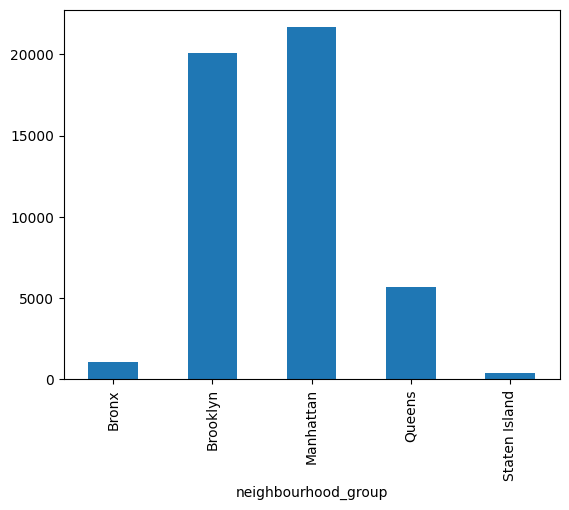

In [22]:
nhgroup["price"].plot(kind="bar")

plt.show()

### 4.2 Se muestra una gráfica de los vecindarios más demandados

<BarContainer object of 15 artists>

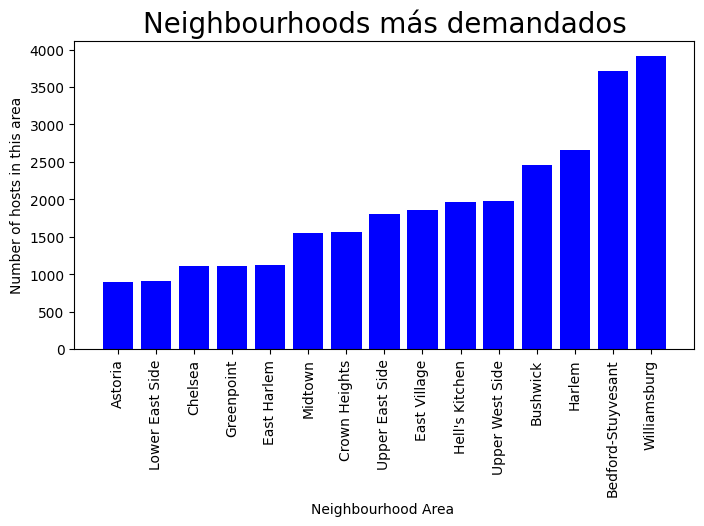

In [23]:


top_15 = df.neighbourhood.value_counts().head(15)
plt.figure(figsize=(8, 4))
x = list(top_15.index)
y = list(top_15.values)
x.reverse()
y.reverse()

plt.title('Neighbourhoods más demandados', size=20)
plt.ylabel('Number of hosts in this area')
plt.xlabel('Neighbourhood Area ')
plt.xticks( rotation='vertical', size=10)

plt.bar(x, y , color='blue')

### 4.3 En los siguientes gráficos observamos los princpales tipos de alojamiento en los 15 vecindarios más demandados.
### La mayoría de los alojamientos más demandados se ubican en Manhattan y Brooklyn, siendo el home/apt la principal opción.

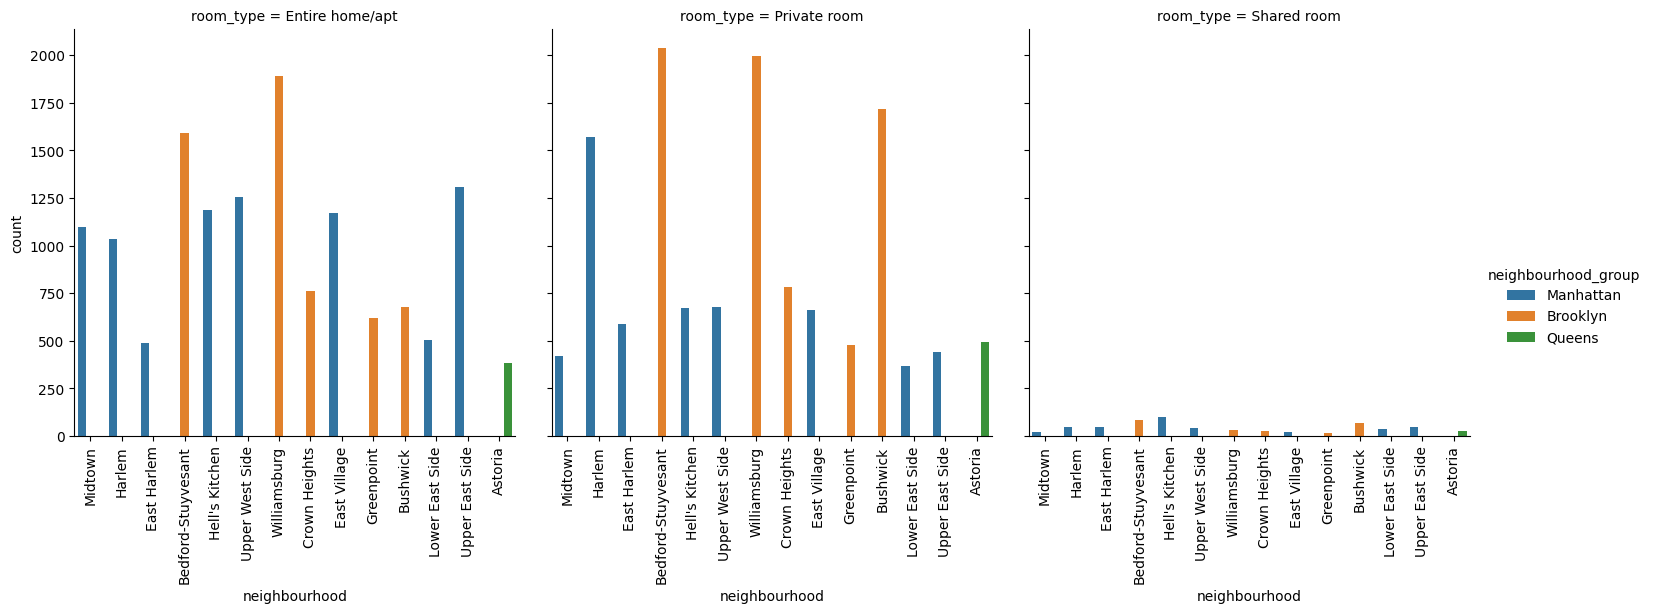

In [24]:
s1=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown', 'East Harlem', 'Greenpoint', 'Lower East Side', 'Astoria'])]

v2=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=s1, kind='count')
v2.set_xticklabels(rotation=90)

### 4.4  Visualización de los quince principales propietarios de alojamientos vacacionales en los 5 Distritos de NYC

[Text(0, 0, '219517861'),
 Text(1, 0, '107434423'),
 Text(2, 0, '30283594'),
 Text(3, 0, '137358866'),
 Text(4, 0, '16098958'),
 Text(5, 0, '12243051'),
 Text(6, 0, '61391963'),
 Text(7, 0, '22541573'),
 Text(8, 0, '200380610'),
 Text(9, 0, '7503643'),
 Text(10, 0, '1475015'),
 Text(11, 0, '120762452'),
 Text(12, 0, '2856748'),
 Text(13, 0, '205031545'),
 Text(14, 0, '190921808')]

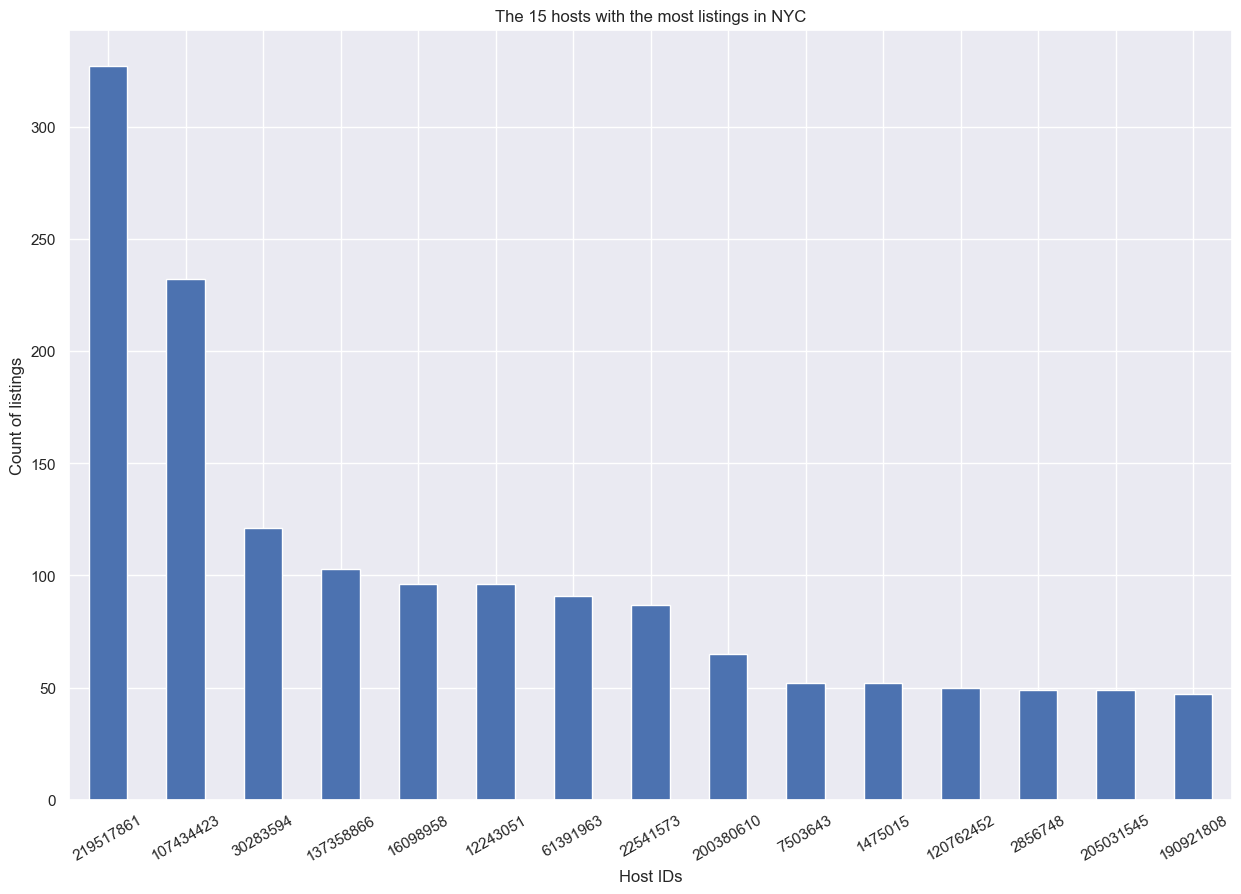

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
v1=top_host.plot(kind='bar')
v1.set_title('The 15 hosts with the most listings in NYC')
v1.set_ylabel('Count of listings')
v1.set_xlabel('Host IDs')
v1.set_xticklabels(v1.get_xticklabels(), rotation=30)

### 4.5 Visualización de outliers con los precios promedios en los 5 Distritos de NYC

Text(0.5, 0.98, '')

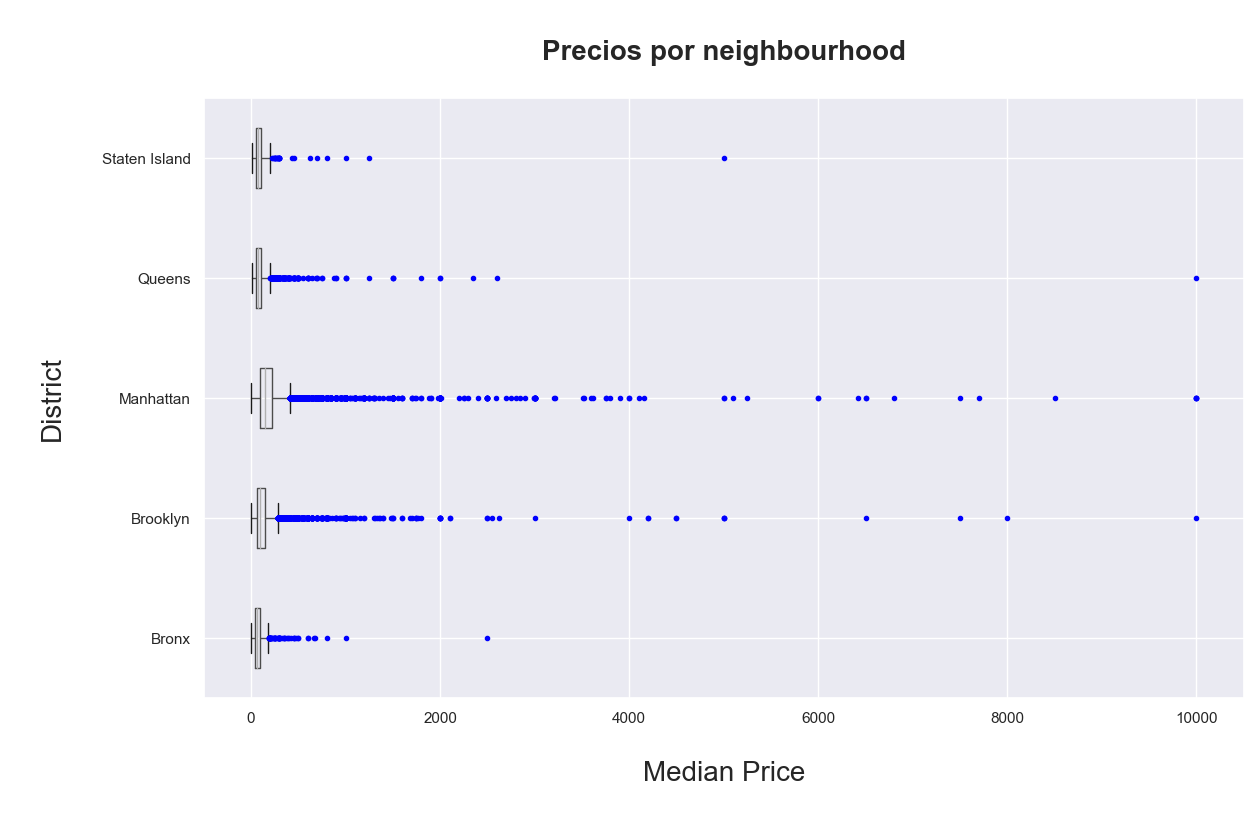

In [26]:
red_square = dict(markerfacecolor='blue', markeredgecolor='blue', marker='.')
df.boxplot(column='price', by='neighbourhood_group', 
           flierprops=red_square, vert=False, figsize=(13,8))
plt.xlabel('\nMedian Price\n', fontsize=20)
plt.ylabel('\nDistrict\n', fontsize=20)
plt.title('\nPrecios por neighbourhood\n', fontsize=20, fontweight='bold')
plt.suptitle('')

### 4.6  Se han descartado los alojamientos con valor superior a $500  

Text(0.5, 1.0, 'Distribución de precios por neighbourhood')

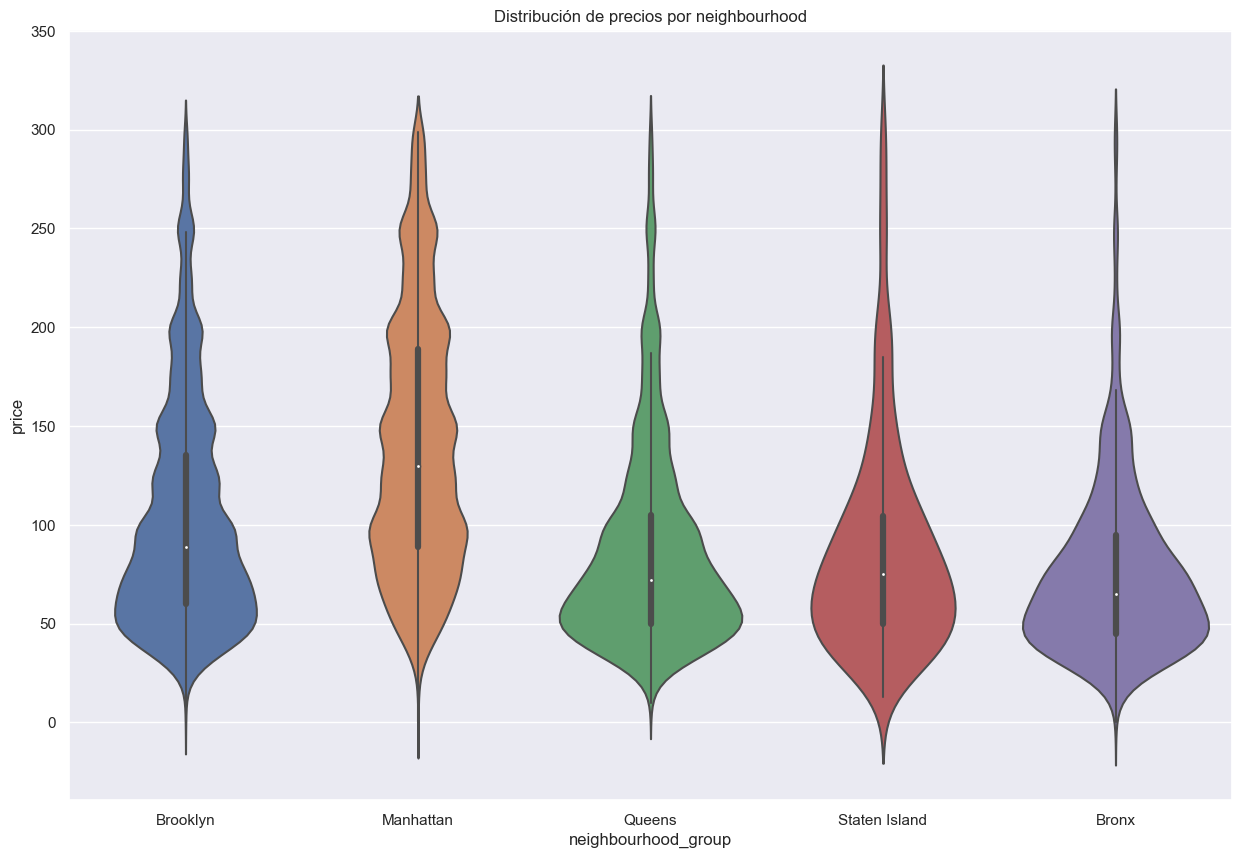

In [27]:
s2=df[df.price < 300] 
v3=sns.violinplot(data=s2, x='neighbourhood_group', y='price')
v3.set_title('Distribución de precios por neighbourhood')

### 4.7  En la siguiente visualización podemos observar la distribución y concentración de la oferta de alojamiento en NYC

Text(0.5, 1.0, 'Distribución y concentración de la oferta de alojamiento en NYC')

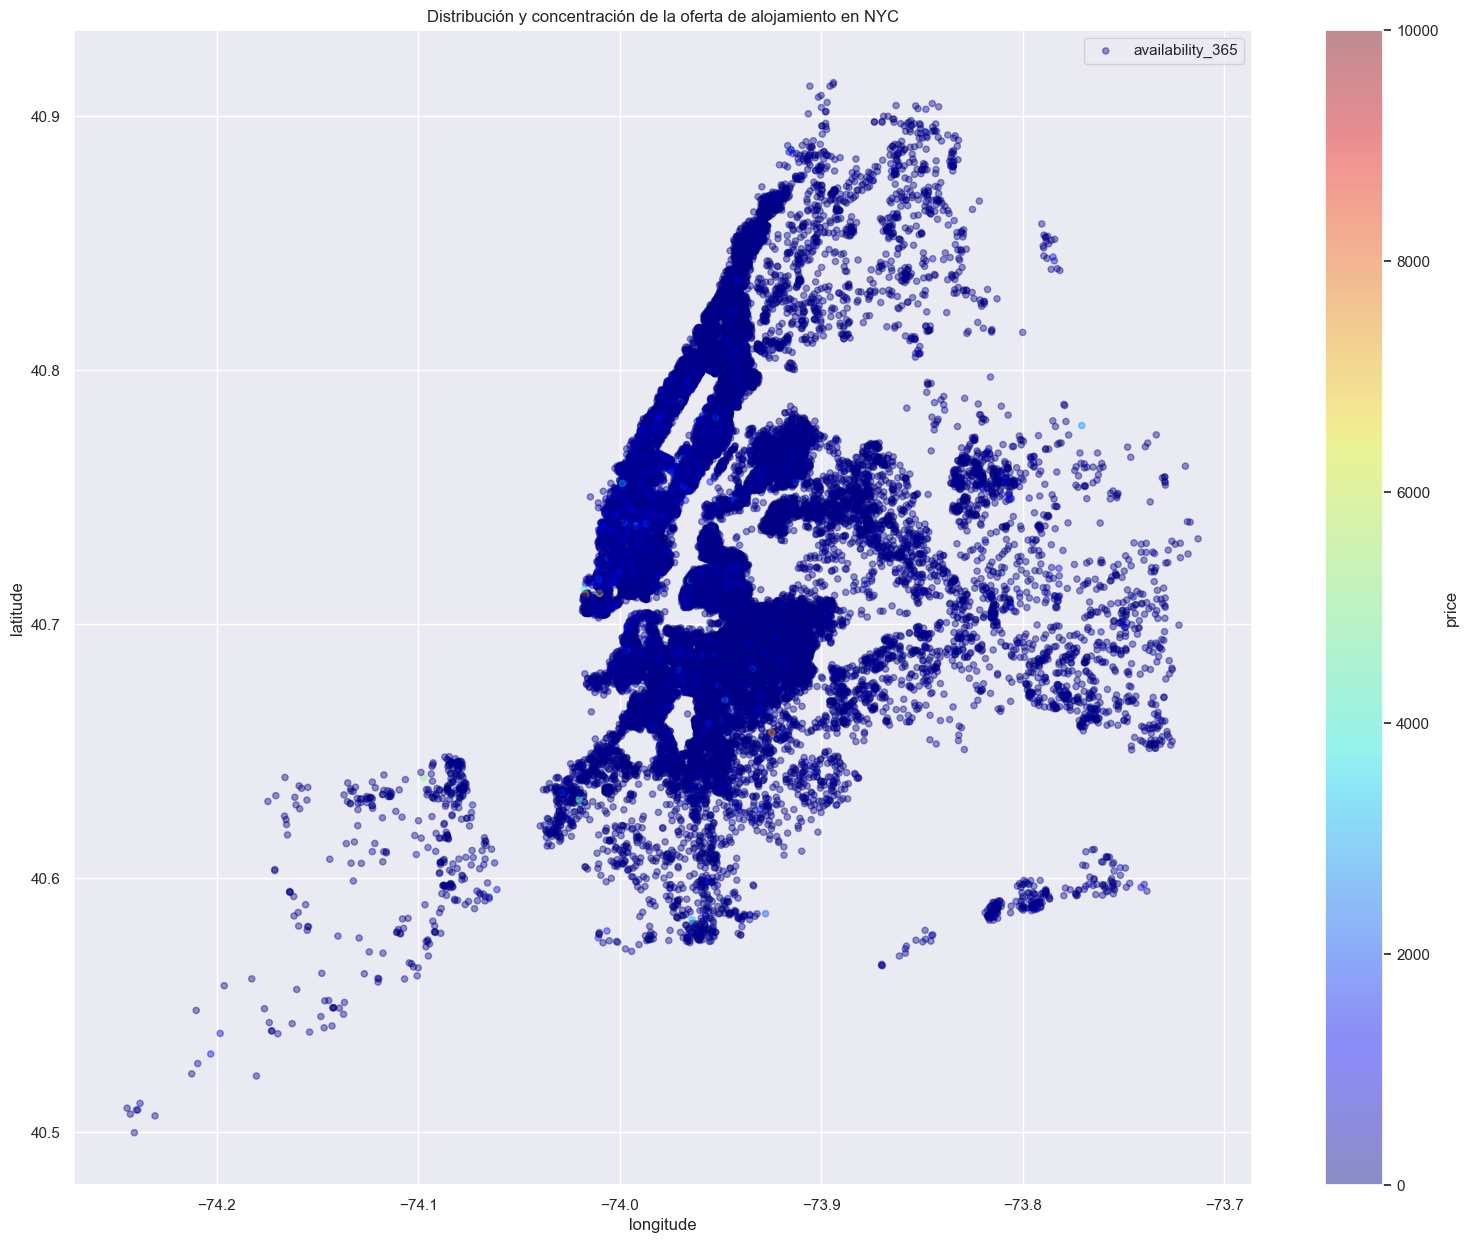

In [28]:
v4=df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(19,15))
v4.legend()
v4.set_title('Distribución y concentración de la oferta de alojamiento en NYC')

<img src="NYC.png" style="width:1000px;height:600px"/>

### 4.8 La mayor concentracion de la oferta de alojamiento vacacional, se concentran en Manhttan y Brooklyn, lugares en los que se ubica las mayores atracciones turisticas en New York

**4.8.1 Dentro de los Distritos de  Manhattan y Brooklyn, se ubican los 14 vencindarios con mayor oferta de alojamiento**

* Williamsburg          3920
* Bedford-Stuyvesant    3714
* Harlem                2658
* Bushwick              2465
* Upper West Side       1971
* Hell's Kitchen        1958
* East Village          1853
* Upper East Side       1798
* Crown Heights         1564
* Midtown               1545
* East Harlem           1117
* Greenpoint            1115
* Chelsea               1113
* Lower East Side        911
* Astoria                900

**4.8.2  Los principales propietarios tienen mas de 100 alojamientos para alquilar, siendo el principal El Host ID 219517861 y la mayor parte de los alojamientos (32303) pertencen a un solo propietario, lo cual representa el 66.06% de la oferta de alojamiento**


**4.8.3 La principal oferta de alojamiento son casas o apartamentos completos = 25,409 total seguidos por habitaciones privadas 22,326 y en ultima instancia cuartos compartidos 1,160**

**4.8.4 PRECIOS: Los mayores costos de alquiler, se ubican en el distrito de Manhattan, seguidos por Brooklyn y el mas economico en el Bronx. 
    Esto esta relacionado con el valor de las viviendas de cada Distrito y ademas con los servicios que tienen Ej: En Bronx hay mucha concentracion de poblacion en comparacion con Manhattan y perfil socioeconomico de los habitantes de Bronx hace que paguen menos impuestos locales lo cual repercute en menor calidad de los servicios publicos (escuelas, parques, estaciones de metro, etc )** 
    
**Los elevados precios de los inmuebles de Manhattan siguen estando respaldados por las altas rentas locales, tal y como se desprende del informe UBS Global Bubble. 
Manhattan es un juego a largo plazo. Los inversores compran propiedades en Manhattan por seguridad. Dados los costes que conlleva, no es un lugar para la especulación desnuda o el flipping.**

**Disipación de descuentos de Covid**

**En comparación con el mismo trimestre del año pasado, el precio medio por pie cuadrado disminuyó un 3,6%. Esto se ha denominado el "descuento Covid". En el primer trimestre, este diferencial fue del 9%, lo que demuestra que el descuento covid se está comprimiendo rápidamente. Esperamos que el descuento covid se disipe en el tercer trimestre y desaparezca en el cuarto, a medida que los empleadores suspendan o limiten el "trabajo desde casa".
Precios actuales en el trimestre:** 

**¿Es Brooklyn más caro que Nueva York?**

**Según el informe, TriBeCa arrebató a Hudson Yards el primer puesto de barrio más caro, título que ya había ostentado en numerosas ocasiones. Y, por primera vez, Brooklyn superó a Manhattan en cuanto a número de barrios entre los 50 más caros, con DUMBO en el número 4 (tuvo un precio medio de venta de 2 millones de dólares)**

    

<img src="Capture.PNG" style="width:900px;height:500px"/>



**4.8.5 Con las graficas de violin y boxplot, notamos que hay una media de valores para: Brooklyn, Queens, Staten Island y Bronx de 50 precio por dia y para Manhattan nos enseña que es diferente ya que corresponde a 100**